# Visualizations using the sales estimates

In [1]:
# BASIC IMPORTS BEFORE WE BEGIN
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import csv
import statsmodels.formula.api as smf
from scipy.stats import pearsonr
import numpy as np
import random
import scipy.stats as ss

In [3]:
authordata = pd.read_csv('salesdata/authordata.csv', index_col = 'author')
onlyboth = pd.read_csv('salesdata/pairedwithprestige.csv', index_col = 'author')

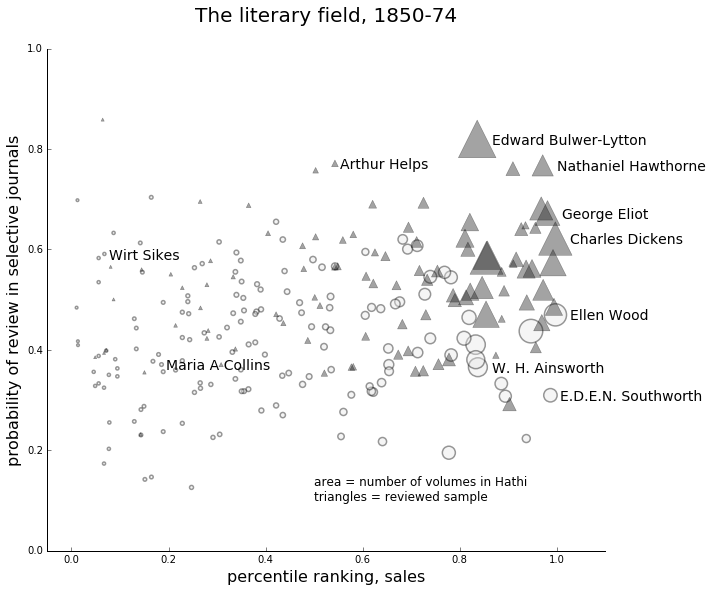

In [71]:
def get_a_period(aframe, floor, ceiling):
    ''' Extracts a chronological slice of our data.
    '''
    subset = aframe[(aframe.midcareer >= floor) & (aframe.midcareer < ceiling)]
    x = subset.percentile
    y = subset.prestige
    return x, y, subset

def get_an_author(anauthor, aframe):
    ''' Gets coordinates for an author in a given space.
    '''
    if anauthor not in aframe.index:
        return 0, 0
    else:
        x = aframe.loc[anauthor, 'percentile']
        y = aframe.loc[anauthor, 'prestige']
        size = aframe.loc[anauthor, 'num_vols']
        return x, y, size

def plot_author(officialname, vizname, aperiod, ax):
    x, y, size = get_an_author(officialname, aperiod)
    if size < 25:
        offset = 0.01
    elif size < 100:
        offset = 0.02
    else:
        offset = 0.03
    ax.text(x + offset, y - 0.01, vizname, fontsize = 14)

def revtocolor(number):
    if number > 0.1:
        return '0.7'
    else:
        return 'white'
    
def revtomark(number):
    if number > 0.1:
        return '^'
    else:
        return 'o'

def revtobinary(number):
    if number > 0.1:
        return 1
    else:
        return 0
    
# Let's plot the mid-Victorians

xvals, yvals, victoriana = get_a_period(onlyboth, 1840, 1875)
victoriana = victoriana.assign(samplecolor = victoriana.reviews.apply(revtocolor))
victoriana = victoriana.assign(marker = victoriana.reviews.apply(revtomark))
fig, ax = plt.subplots(figsize = (10,9))
for m in ['o', '^']:
    thisgroup = victoriana[victoriana.marker == m]
    if m == 'o':
        face = '0.9'
        lwd = '1.5'
        edge = 'black'
    elif m == '^':
        lwd = '0.5'
        face = '0.1'
        edge = 'black'
    ax.scatter(thisgroup.percentile, thisgroup.prestige, s = thisgroup.num_vols * 3 + 7, alpha = 0.4,
                             edgecolor = edge, facecolor = face, marker = m, linewidth = lwd)

authors_to_plot = {'Dickens, Charles': 'Charles Dickens', "Wood, Ellen": 'Ellen Wood', 
                   'Ainsworth, William Harrison': 'W. H. Ainsworth', 
                   'Lytton, Edward Bulwer Lytton': 'Edward Bulwer-Lytton',
                  'Eliot, George': 'George Eliot', 'Sikes, Wirt': 'Wirt Sikes', 
                   'Collins, A. Maria': 'Maria A Collins',
                  'Hawthorne, Nathaniel': "Nathaniel Hawthorne",
                  'Southworth, Emma Dorothy Eliza Nevitte': 'E.D.E.N. Southworth',
                  'Helps, Arthur': 'Arthur Helps'}

for officialname, vizname in authors_to_plot.items():
    plot_author(officialname, vizname, victoriana, ax)

ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('percentile ranking, sales', fontsize = 16)
ax.set_ylabel('probability of review in selective journals', fontsize = 16)
ax.set_title('The literary field, 1850-74\n', fontsize = 20)
ax.text(0.5, 0.1, 'area = number of volumes in Hathi\ntriangles = reviewed sample', color = 'black', fontsize = 12)
ax.set_ylim((0,1))
ax.set_xlim((-0.05,1.1))

spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
plt.savefig('images/field1850noline.png', bbox_inches = 'tight')
plt.show()

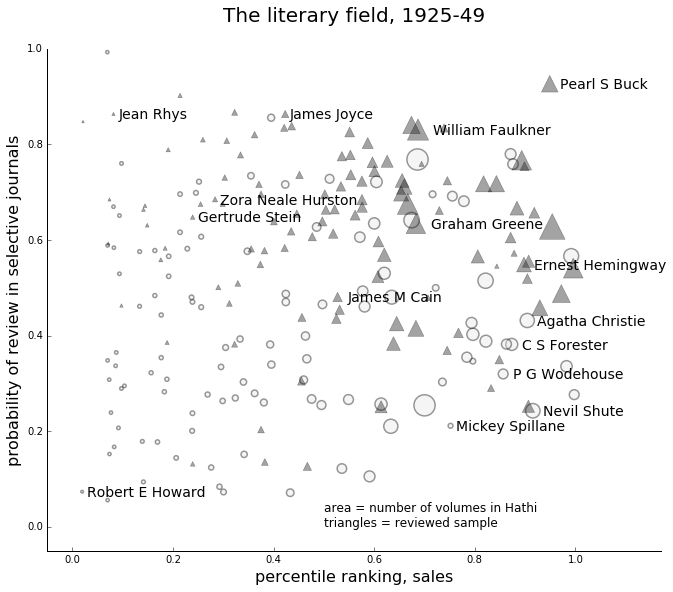

In [69]:
# Let's plot modernism!

xvals, yvals, modernity2 = get_a_period(onlyboth, 1925,1950) 
modernity2 = modernity2.assign(samplecolor = modernity2.reviews.apply(revtocolor))
modernity2 = modernity2.assign(marker = modernity2.reviews.apply(revtomark))
fig, ax = plt.subplots(figsize = (11,9))
for m in ['o', '^']:
    thisgroup = modernity2[modernity2.marker == m]
    if m == 'o':
        face = '0.9'
        lwd = '1.5'
        edge = 'black'
    elif m == '^':
        lwd = '0.5'
        face = '0.1'
        edge = 'black'
    ax.scatter(thisgroup.percentile, thisgroup.prestige, s = thisgroup.num_vols * 3 + 7, alpha = 0.4,
                             edgecolor = edge, facecolor = face, marker = m, linewidth = lwd)

authors_to_plot = {'Cain, James M': 'James M Cain', 'Faulkner, William': 'William Faulkner',
                   'Stein, Gertrude': 'Gertrude Stein', 'Hemingway, Ernest': 'Ernest Hemingway',
                  'Joyce, James': 'James Joyce', 'Forester, C. S. (Cecil Scott)': 'C S Forester',
                  'Spillane, Mickey': 'Mickey Spillane', 
                   'Howard, Robert E': 'Robert E Howard', 'Buck, Pearl S': 'Pearl S Buck',
                  'Shute, Nevil': 'Nevil Shute', 'Greene, Graham': 'Graham Greene', 
                   'Christie, Agatha': 'Agatha Christie', 'Rhys, Jean': 'Jean Rhys',
                   'Wodehouse, P. G': 'P G Wodehouse',
                   'Hurston, Zora Neale': 'Zora Neale Hurston'}

for officialname, vizname in authors_to_plot.items():
    plot_author(officialname, vizname, modernity2, ax)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlabel('percentile ranking, sales', fontsize = 16)
ax.set_ylabel('probability of review in selective journals', fontsize = 16)
ax.set_title('The literary field, 1925-49\n', fontsize = 20)
ax.text(0.5, 0.0, 'area = number of volumes in Hathi\ntriangles = reviewed sample', color = 'black', fontsize = 12)
ax.set_ylim((-0.05,1))
ax.set_xlim((-0.05, 1.17))

#modernity2 = modernity2.assign(binaryreview = modernity2.reviews.apply(revtobinary))
#y, X = dmatrices('binaryreview ~ percentile + prestige', data=modernity2, return_type='dataframe')
#crudelm = smf.Logit(y, X).fit()
#params = crudelm.params
#theintercept = params[0] / -params[2]
#theslope = params[1] / -params[2]
#newX = np.linspace(0, 1, 20)
#abline_values = [theslope * i + theintercept for i in newX]
#ax.plot(newX, abline_values, color = 'black')
spines_to_remove = ['top', 'right']
for spine in spines_to_remove:
    ax.spines[spine].set_visible(False)
plt.savefig('images/field1925noline.png', bbox_inches = 'tight')
plt.show()

#print(theslope)